THE FOLLOWING IS A KNN CLASSIFIER FOR PREDICTING VIDEO GAME GENRE PREFERENCES


*   This classifier predicts a person's favorite video game genre based on their age, height, weight, and gender.
*   The inputs are of 4 floating point numbers representing age in years, height in inches, weight in lbs, and gender as a 1 for females, and 0 for males





In [88]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
url = "https://gist.githubusercontent.com/dhar174/14177e1d874a33bfec565a07875b875a/raw/7aa9afaaacc71aa0e8bc60b38111c24e584c74d8/data.csv"

# Names for the columns
names = ['age','height','weight','gender','genre']

# Read the dataset to pandas dataframe
dataset = pd.read_csv(url, names = names)

In [94]:
# display the table we just initialiazed
dataset.head()

,age,height,weight,gender,genre
0,15,66,237,0,Strategy
1,21,60,238,0,Platformer
2,14,78,176,1,Strategy
3,10,67,216,1,Strategy
4,19,69,185,1,RPG


In [95]:
# we have 201 rows and 5 columns
dataset.shape

(201, 5)

In [96]:
# Create numpy arrays for features and target
X = dataset.drop('genre',axis=1).values
y = dataset['genre'].values

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [118]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

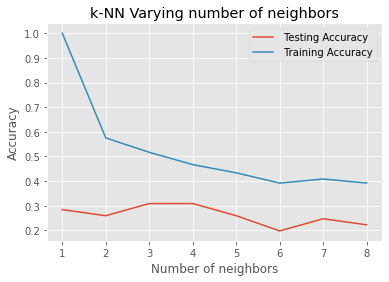

In [119]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label=' Testing Accuracy')
plt.plot(neighbors, train_accuracy, label=' Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [120]:
# Maximum testing accuracy k = 3

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=4)


In [121]:
# Fitting the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [122]:
# Get the accuracy
knn.score(X_test,y_test)

0.30864197530864196

As we can see, with a test size of about 40%, the accuracy is not great at 30.086%, even with the best k selected. 